## Miscellaneous notebook for dissecting individual saved LaserSequences in an annealing database

In [1]:
import simulationlib as sl
%matplotlib widget
import annealing_database2 as adb2

import numpy as np
import matplotlib.pyplot as plt
import os


print(os.getcwd())

DBPATH = r".\annealing records\50um Al ASB New Database\50um Al ASB.dill"
# DBPATH = r".\annealing records\50um TiW Matrix 2\matrix2.dill"

FIGPATH = r".\figures"
database = adb2.DatabaseWrapper(DBPATH)

# ENSURE these are properly configured to match those in TAP's settings.
CENTERING_OFFSETS = (-2, -1.5)

C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib


In [2]:
def power_profile(entry, polling=0.1):
    '''
    Grabs power-vs-time profile from a DataEntry object.

    polling: how often to sample parametrically defined power curves.
    '''
    seq = entry.sequence
    tstop = seq.duration
    times = np.arange(0, tstop, polling)
    y = []
    for t in times:
        pulse_active = False
        for p in seq.pulses:
            result = p.run(t)
            if result is not None:
                y.append(p.modulate_beam(t) * p.power)
                pulse_active = True
                break
        if not pulse_active:
            y.append(0)
                
    return times, y
    

## Visualize a ChipRecord's annealing history.
This also renders a full-sized png file:

C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib\annealing_database2.py:361: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.read_csv(db.csvpath, sep=',', parse_dates=["Date"], dayfirst=False)
C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib\annealing_database2.py:361: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.read_csv(db.csvpath, sep=',', parse_dates=["Date"], dayfirst=False)
C:\Users\ssuub\Desktop\Damage analysis\EDET80k_Damage\Lasing Analysis\apps\Simulation and BeamLib\annealing_database2.py:289: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decoration

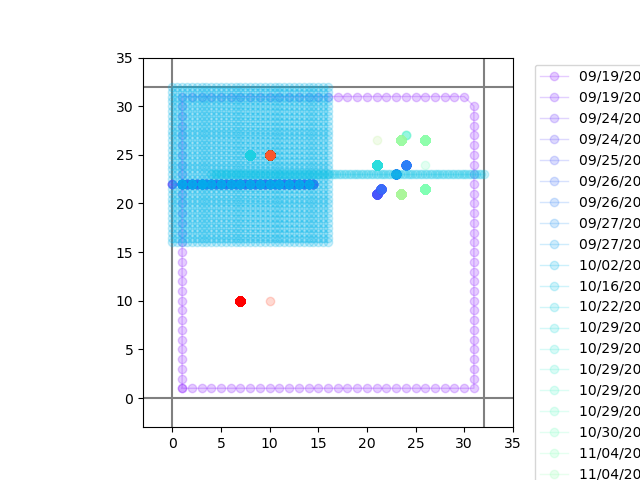

In [3]:
database.visualize(fpath="./pulse browser visualization.png")
record = database.get_entries()

In [ ]:
for ID, entry in record:
    print(ID)
    print(entry)
    

In [ ]:
PULSE_ID = "a523ebab4a3afa323402d4ee35998c4c"

entry = database.load_entry(PULSE_ID)

In [ ]:
times, power = power_profile(entry)

name = "Binary pulses"

plt.close(1)
fig1, ax1 = plt.subplots(num=1)

ax1.set_title(f"Beam Modulation: {name}")
ax1.plot(times, power)
ax1.set_xlim(0, 20)
ax1.set_ylabel("Power (W)")
ax1.set_xlabel("Time (s)")

fig1.savefig(fname=f"{FIGPATH}\{name}.png")

plse = entry.sequence.pulses[0]

print(plse.x, plse.y)
plt.show()

In [ ]:
TAP_dbpath = r"C:\Users\ssuub\Desktop\MPSD-TAP\TAPV-2\Application\pythonFiles\DataTextFiles\michaeltest1.txt"

entry.sequence.write_to_cycle_code(TAP_dbpath, 0.04, *CENTERING_OFFSETS)

In [ ]:
notes = "80C repeated shots: 5s x 180, LEFT"
database.write_sequence(entry.sequence, notes=notes)